In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import tensorflow as tf
from model import SparseAutoencoder
import input_data

In [2]:
sess = tf.InteractiveSession()

In [4]:
mnist = input_data.read_data_sets("../MNIST_data/")

Extracting ../MNIST_data/train-images-idx3-ubyte.gz
Extracting ../MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
inputs = tf.placeholder(tf.float32, [None, 28 * 28])
encoder = SparseAutoencoder(inputs, n_input=28 * 28, n_hidden=2000, sparsity=0.001)

In [7]:
saver = tf.train.Saver()
saver.restore(sess, "sparse_autoencoder.ckpt")

In [8]:
X_test = mnist.test.images[:32]
outputs = sess.run(encoder.outputs, feed_dict={inputs: X_test})

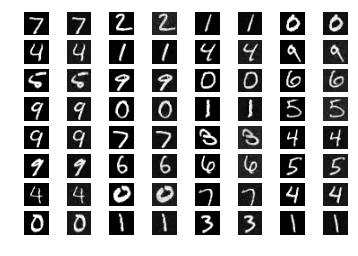

In [10]:
plt.figure()
for i in xrange(len(reconst)):
    plt.subplot(8, 8, 2 * i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.subplot(8, 8, 2 * i + 2)
    plt.imshow(outputs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

In [11]:
weights = encoder.fc1w.eval()

In [15]:
weights.shape

(784, 2000)

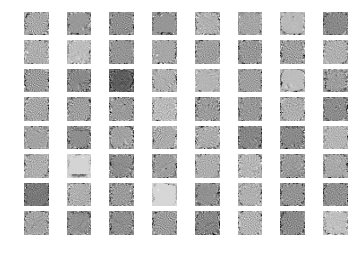

In [16]:
indices = np.random.choice(np.shape(weights)[1], 64, replace=False)
for i, index in enumerate(indices):
    plt.subplot(8, 8, i + 1)
    plt.imshow(weights[:, index].reshape(28, 28), cmap='gray')
    plt.axis('off')